# Initial Graphs

Graphing data for exploratory data analysis.

In [1]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
datapath = 'Data/national_csv/national_tes.csv'

In [3]:
df = pd.read_csv(datapath)
df.head()

GEOID      place   state state_abbr                  county  \
0  20200001011  Anchorage  Alaska         AK  Anchorage Municipality   
1  20200001012  Anchorage  Alaska         AK  Anchorage Municipality   
2  20200001021  Anchorage  Alaska         AK  Anchorage Municipality   
3  20200001022  Anchorage  Alaska         AK  Anchorage Municipality   
4  20200001023  Anchorage  Alaska         AK  Anchorage Municipality   

                   ua_name  ua_pop                            congressio  \
0  Anchorage Northeast, AK   29561  AK Congressional District (at Large)   
1  Anchorage Northeast, AK   29561  AK Congressional District (at Large)   
2  Anchorage Northeast, AK   29561  AK Congressional District (at Large)   
3  Anchorage Northeast, AK   29561  AK Congressional District (at Large)   
4  Anchorage Northeast, AK   29561  AK Congressional District (at Large)   

   cbg_pop  acs_pop  ...  linguistic  lingnorm health_nor  temp_diff  \
0     3234   3055.0  ...    0.000379  0.026925   0.412103      -1.44   
1     1787   2545.0  ...    0.000379  0.026925   0.412103      -5.19   
2      669    595.0  ...    0.000000  0.000000   0.761111      -4.47   
3     1066   1888.0  ...    0.000000  0.000000   0.761111       0.41   
4     1509   1969.0  ...    0.000000  0.000000   0.761111       0.13   

   temp_norm  tes  tesctyscor  holc_grade  child_perc  seniorperc  
0   0.208102   73        76.0         NaN    0.334206    0.115876  
1   0.000000   74        76.0         NaN    0.156385    0.130452  
2   0.039956   69        76.0         NaN    0.235294    0.312605  
3   0.310766   68        76.0         NaN    0.256356    0.147246  
4   0.295228   71        76.0         NaN    0.178771    0.139665  

[5 rows x 36 columns]

In [4]:
import geopandas as gdf

entry = df['state'].value_counts()
entries = pd.DataFrame(entry).reset_index()
entries = entries.rename(columns={"state": "Amount", "index": "State"}, errors="raise")

In [5]:
import plotly.express as px

state_mapping = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

entries['State Abbreviation'] = entries['State'].map(state_mapping)

fig = px.choropleth(
    entries,
    locations='State Abbreviation',
    locationmode='USA-states',
    color='Amount',
    scope='usa',
    title='Amount of Data per State',
    color_continuous_scale='YlOrRd',
)

fig.update_geos(fitbounds="locations")

fig.show()

## Missing Data

The tree canopy and tc_gap columns are mostly NAs so they can be dropped.

In [6]:
# The -1.0 values are also null values, so we will replace them with NaN 
df = df.replace(-1.0, np.nan) 

In [7]:
df.isnull().sum()

GEOID              0
place          13678
state              0
state_abbr         0
county             0
ua_name            0
ua_pop             0
congressio         0
cbg_pop            0
acs_pop            0
land_area          0
biome              0
cnpysource         0
tc_goal            0
treecanopy    194662
tc_gap        194662
priority_i         0
pctpoc             0
pctpocnorm         0
pctpov             0
pctpovnorm         0
unemplrate         0
unemplnorm         0
dep_ratio          0
dep_perc           0
depratnorm         0
linguistic         0
lingnorm           0
health_nor         0
temp_diff        135
temp_norm          0
tes                0
tesctyscor     13672
holc_grade    153338
child_perc         0
seniorperc         0
dtype: int64

Text(0.5, 1.0, 'Number of missing values in each column')

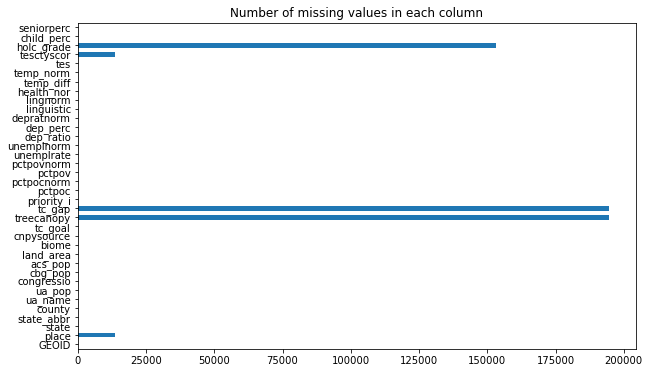

In [8]:
# Make a bar chart of the number of missing values in each column 
plt.figure(figsize=(10, 6))
df.isnull().sum().plot(kind="barh")
plt.title("Number of missing values in each column")

In [9]:
# Find which columns are missing the most data 
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)

missing

temp_diff        135
tesctyscor     13672
place          13678
holc_grade    153338
treecanopy    194662
tc_gap        194662
dtype: int64

Text(0.5, 1.0, 'Number of missing values in each column')

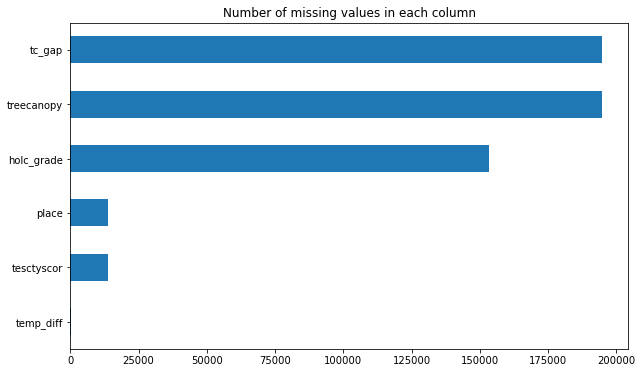

In [10]:
# make a bar chart of missing 
plt.figure(figsize=(10, 6))
missing.plot(kind="barh")
plt.title("Number of missing values in each column")

In [11]:
# Drop tc_gap and treecanopy 
df = df.drop(['tc_gap', 'treecanopy'], axis=1)

In [12]:
df.head()

GEOID      place   state state_abbr                  county  \
0  20200001011  Anchorage  Alaska         AK  Anchorage Municipality   
1  20200001012  Anchorage  Alaska         AK  Anchorage Municipality   
2  20200001021  Anchorage  Alaska         AK  Anchorage Municipality   
3  20200001022  Anchorage  Alaska         AK  Anchorage Municipality   
4  20200001023  Anchorage  Alaska         AK  Anchorage Municipality   

                   ua_name  ua_pop                            congressio  \
0  Anchorage Northeast, AK   29561  AK Congressional District (at Large)   
1  Anchorage Northeast, AK   29561  AK Congressional District (at Large)   
2  Anchorage Northeast, AK   29561  AK Congressional District (at Large)   
3  Anchorage Northeast, AK   29561  AK Congressional District (at Large)   
4  Anchorage Northeast, AK   29561  AK Congressional District (at Large)   

   cbg_pop  acs_pop  ...  linguistic  lingnorm health_nor  temp_diff  \
0     3234   3055.0  ...    0.000379  0.026925   0.412103      -1.44   
1     1787   2545.0  ...    0.000379  0.026925   0.412103      -5.19   
2      669    595.0  ...    0.000000  0.000000   0.761111      -4.47   
3     1066   1888.0  ...    0.000000  0.000000   0.761111       0.41   
4     1509   1969.0  ...    0.000000  0.000000   0.761111       0.13   

   temp_norm  tes  tesctyscor  holc_grade  child_perc  seniorperc  
0   0.208102   73        76.0         NaN    0.334206    0.115876  
1   0.000000   74        76.0         NaN    0.156385    0.130452  
2   0.039956   69        76.0         NaN    0.235294    0.312605  
3   0.310766   68        76.0         NaN    0.256356    0.147246  
4   0.295228   71        76.0         NaN    0.178771    0.139665  

[5 rows x 34 columns]

In [13]:
df = df.drop(columns =['place', 'state', 'state_abbr','county', 'ua_name', 'congressio','cnpysource','holc_grade', 'tesctyscor' ])

In [14]:
df.isnull().sum()

GEOID           0
ua_pop          0
cbg_pop         0
acs_pop         0
land_area       0
biome           0
tc_goal         0
priority_i      0
pctpoc          0
pctpocnorm      0
pctpov          0
pctpovnorm      0
unemplrate      0
unemplnorm      0
dep_ratio       0
dep_perc        0
depratnorm      0
linguistic      0
lingnorm        0
health_nor      0
temp_diff     135
temp_norm       0
tes             0
child_perc      0
seniorperc      0
dtype: int64

In [15]:
df.head()

GEOID  ua_pop  cbg_pop  acs_pop  land_area   biome  tc_goal  \
0  20200001011   29561     3234   3055.0   8.209274  Forest      0.5   
1  20200001012   29561     1787   2545.0   6.140281  Forest      0.5   
2  20200001021   29561      669    595.0   1.519179  Forest      0.5   
3  20200001022   29561     1066   1888.0   2.764926  Forest      0.5   
4  20200001023   29561     1509   1969.0   4.529689  Forest      0.5   

   priority_i    pctpoc  pctpocnorm  ...  dep_perc  depratnorm  linguistic  \
0    0.345039  0.223568    0.515355  ...  0.450082    0.621153    0.000379   
1    0.401266  0.176817    0.404247  ...  0.286837    0.220347    0.000379   
2    0.394139  0.006723    0.000000  ...  0.547899    1.000000    0.000000   
3    0.460517  0.261123    0.604608  ...  0.403602    0.484690    0.000000   
4    0.376254  0.080752    0.175937  ...  0.318436    0.282945    0.000000   

   lingnorm  health_nor  temp_diff  temp_norm  tes  child_perc  seniorperc  
0  0.026925    0.412103      -1.44   0.208102   73    0.334206    0.115876  
1  0.026925    0.412103      -5.19   0.000000   74    0.156385    0.130452  
2  0.000000    0.761111      -4.47   0.039956   69    0.235294    0.312605  
3  0.000000    0.761111       0.41   0.310766   68    0.256356    0.147246  
4  0.000000    0.761111       0.13   0.295228   71    0.178771    0.139665  

[5 rows x 25 columns]

In [16]:
df = df.drop(columns = 'GEOID')

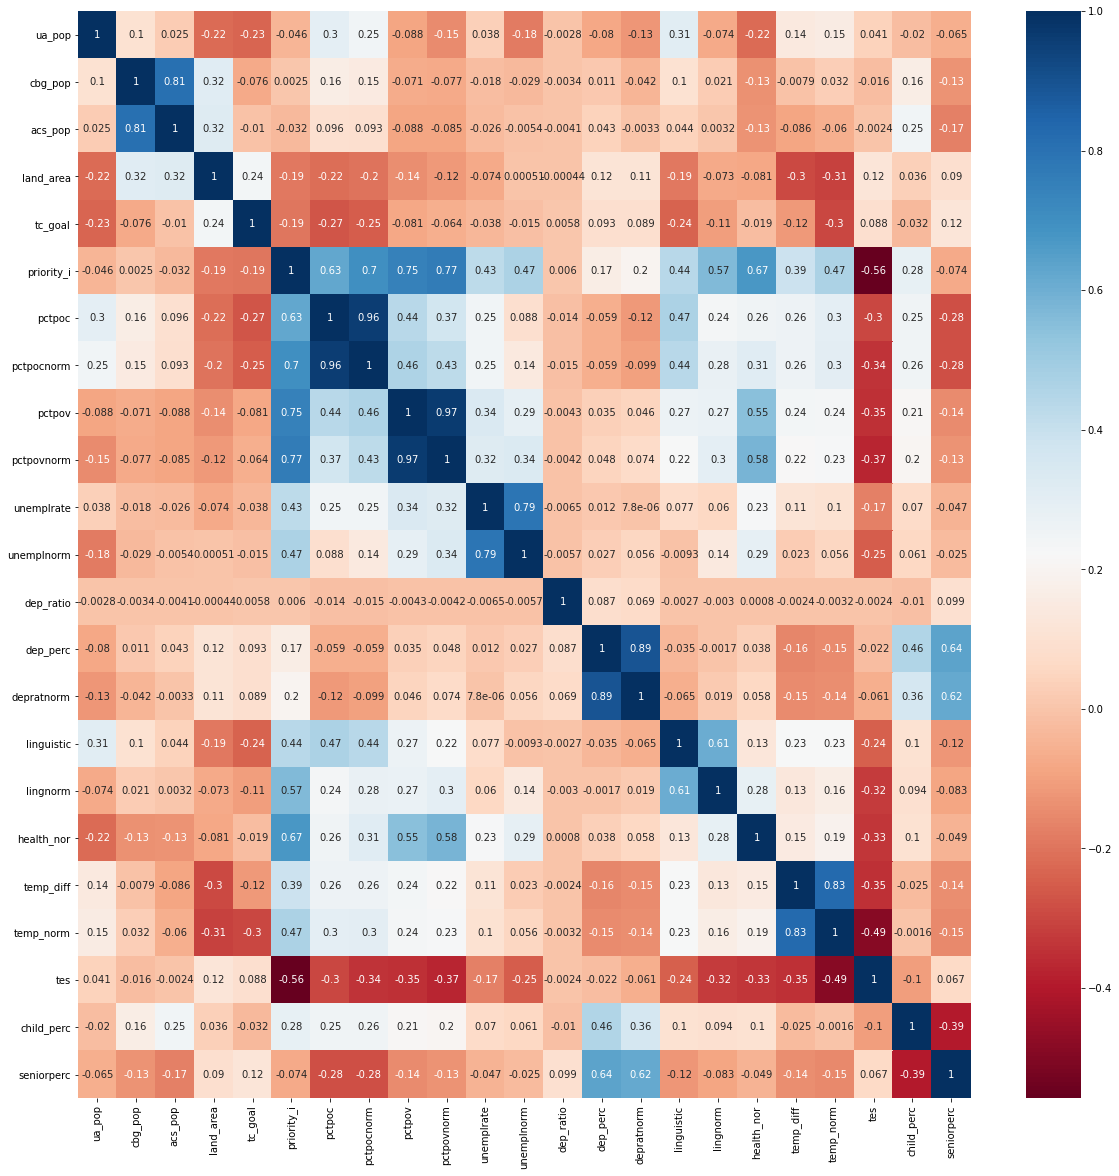

In [18]:
df = df.drop(columns = ['pctpoc', 'pctpov', 'unemplrate', 'dep_ratio','dep_perc', 'linguistic', 'temp_diff'])

In [20]:
def show_corr(df):
    # show correlation between variables
    plt.figure(figsize=(20, 20))
    sns.heatmap(df.corr(), annot=True, cmap="RdBu")
    plt.show()

In [21]:
# Now check the missing values 
missing = df.isnull().sum() 
missing = missing[missing > 0]
missing.sort_values(inplace=True)

missing

Series([], dtype: int64)

In [25]:
# dividing data
numerical_features = df.drop(['biome', 'unemplnorm'], axis = 1)
numerical_features_n_inc_tc_goal = df.drop(['biome', 'unemplnorm','tc_goal'], axis = 1)
categorical_features = df[['biome']]
categorical_features_inc_tc_goal = df[['biome','tc_goal']]

df_y = df['unemplnorm']

In [24]:
df.head()

ua_pop  cbg_pop  acs_pop  land_area   biome  tc_goal  priority_i  \
0   29561     3234   3055.0   8.209274  Forest      0.5    0.345039   
1   29561     1787   2545.0   6.140281  Forest      0.5    0.401266   
2   29561      669    595.0   1.519179  Forest      0.5    0.394139   
3   29561     1066   1888.0   2.764926  Forest      0.5    0.460517   
4   29561     1509   1969.0   4.529689  Forest      0.5    0.376254   

   pctpocnorm  pctpovnorm  unemplnorm  depratnorm  lingnorm  health_nor  \
0    0.515355    0.122218    0.000000    0.621153  0.026925    0.412103   
1    0.404247    0.279557    1.000000    0.220347  0.026925    0.412103   
2    0.000000    0.486684    0.000000    1.000000  0.000000    0.761111   
3    0.604608    0.602632    0.040211    0.484690  0.000000    0.761111   
4    0.175937    0.551805    0.081617    0.282945  0.000000    0.761111   

   temp_norm  tes  child_perc  seniorperc  
0   0.208102   73    0.334206    0.115876  
1   0.000000   74    0.156385    0.130452  
2   0.039956   69    0.235294    0.312605  
3   0.310766   68    0.256356    0.147246  
4   0.295228   71    0.178771    0.139665

## Numeric Data

              ua_pop   cbg_pop   acs_pop  land_area   tc_goal  priority_i  \
ua_pop      1.000000  0.101782  0.024745  -0.222599 -0.234146   -0.045694   
cbg_pop     0.101782  1.000000  0.811002   0.315855 -0.075616    0.002456   
acs_pop     0.024745  0.811002  1.000000   0.319095 -0.010045   -0.032150   
land_area  -0.222599  0.315855  0.319095   1.000000  0.242992   -0.190060   
tc_goal    -0.234146 -0.075616 -0.010045   0.242992  1.000000   -0.193259   
priority_i -0.045694  0.002456 -0.032150  -0.190060 -0.193259    1.000000   
pctpocnorm  0.245795  0.151198  0.092725  -0.201010 -0.248115    0.695811   
pctpovnorm -0.146515 -0.077053 -0.085488  -0.117603 -0.064469    0.768754   
depratnorm -0.125298 -0.042387 -0.003321   0.113008  0.088960    0.199107   
lingnorm   -0.074243  0.021331  0.003153  -0.072614 -0.107005    0.566701   
health_nor -0.222952 -0.134010 -0.126381  -0.081242 -0.019384    0.673903   
temp_norm   0.154572  0.031556 -0.059687  -0.313602 -0.300702    0.470566   

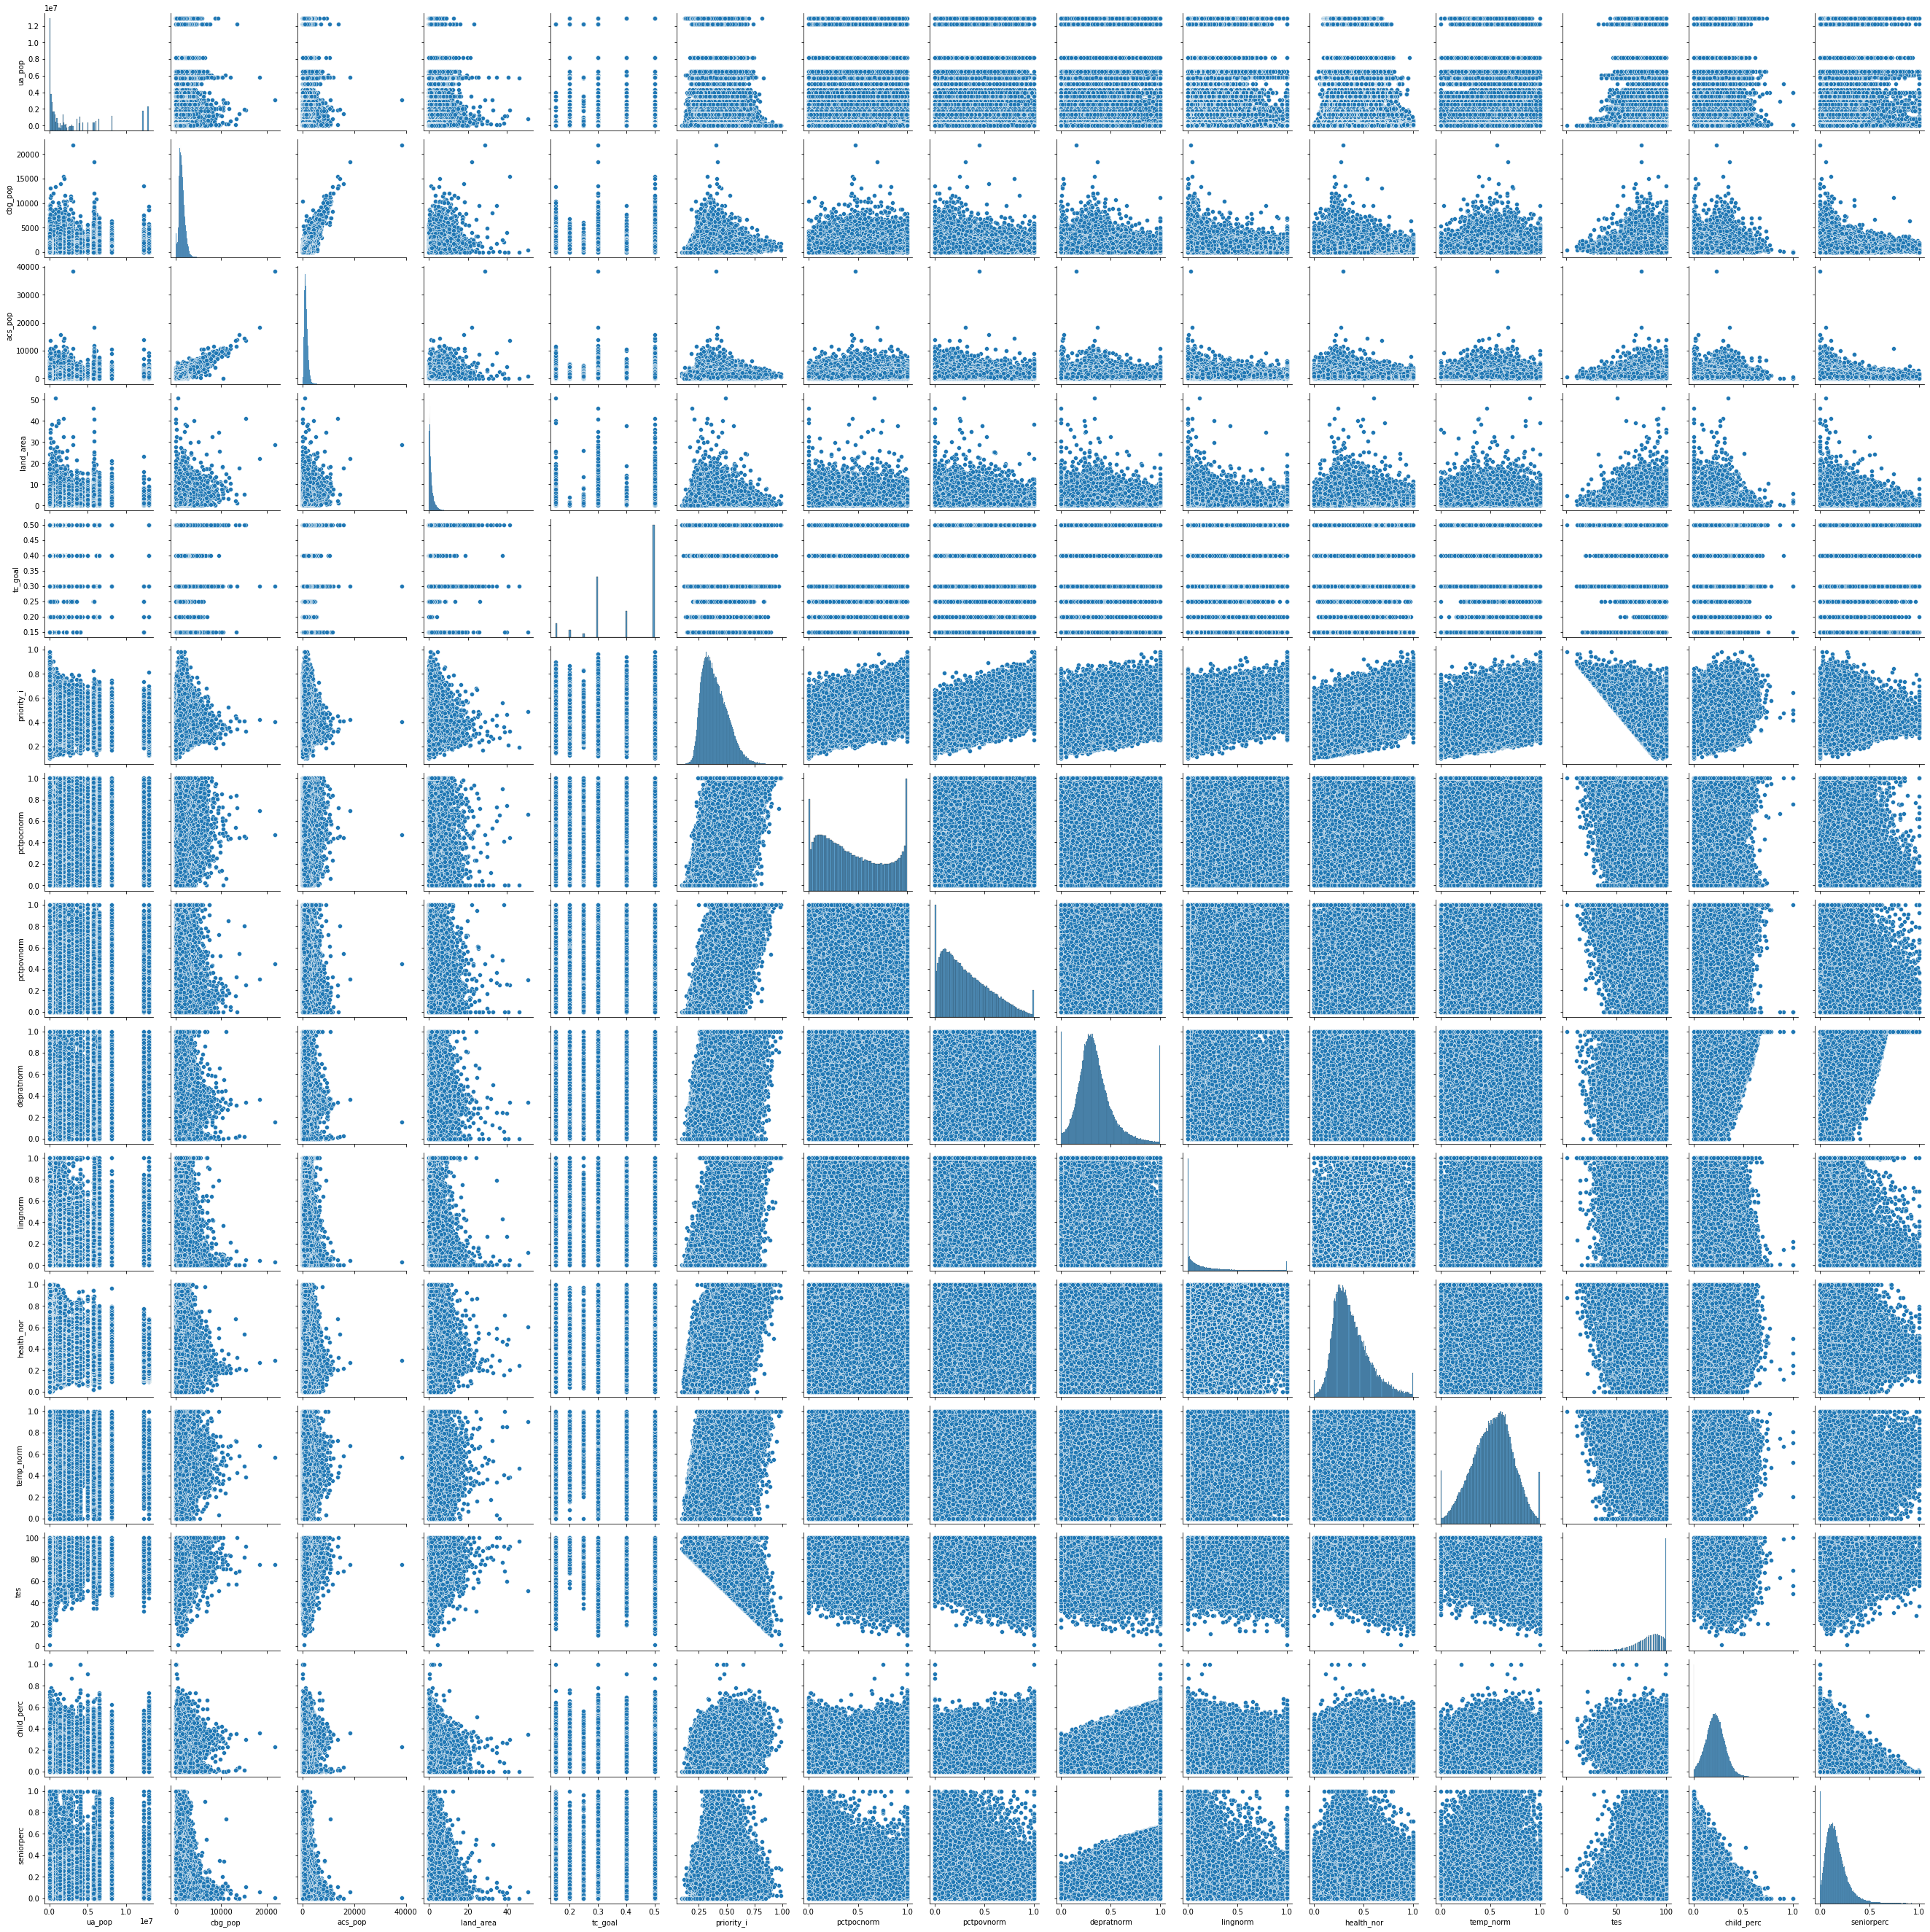

In [25]:
matrix = numerical_features.corr()
print(matrix)
sns.pairplot(numerical_features)

In [26]:
# remove  tc_gap and acs_pop based on correlations
df = df.drop(columns = ['acs_pop'])
numerical_features = numerical_features.drop(columns = ['acs_pop'])

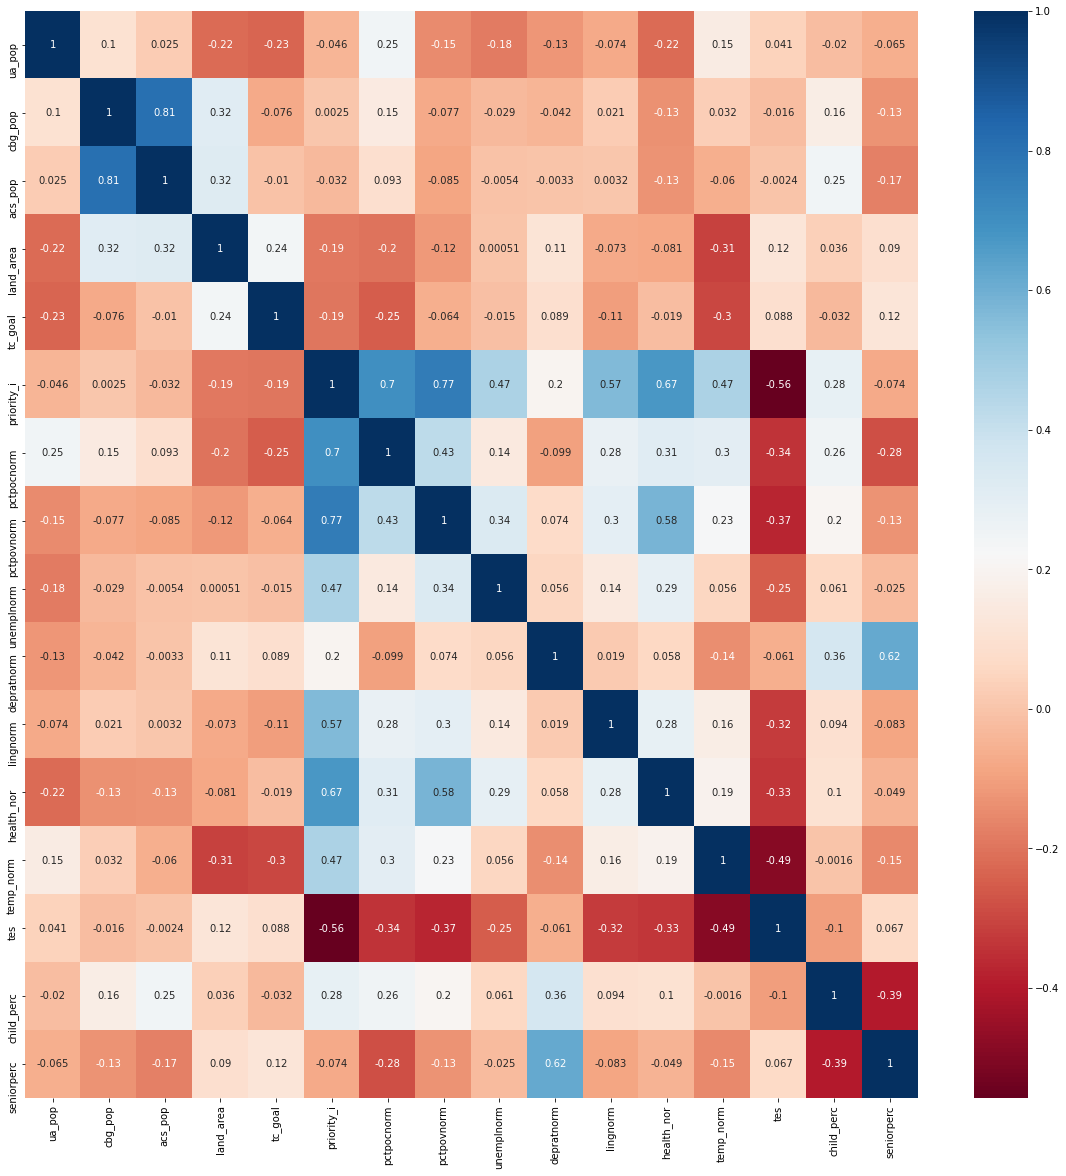

In [27]:
show_corr(df)

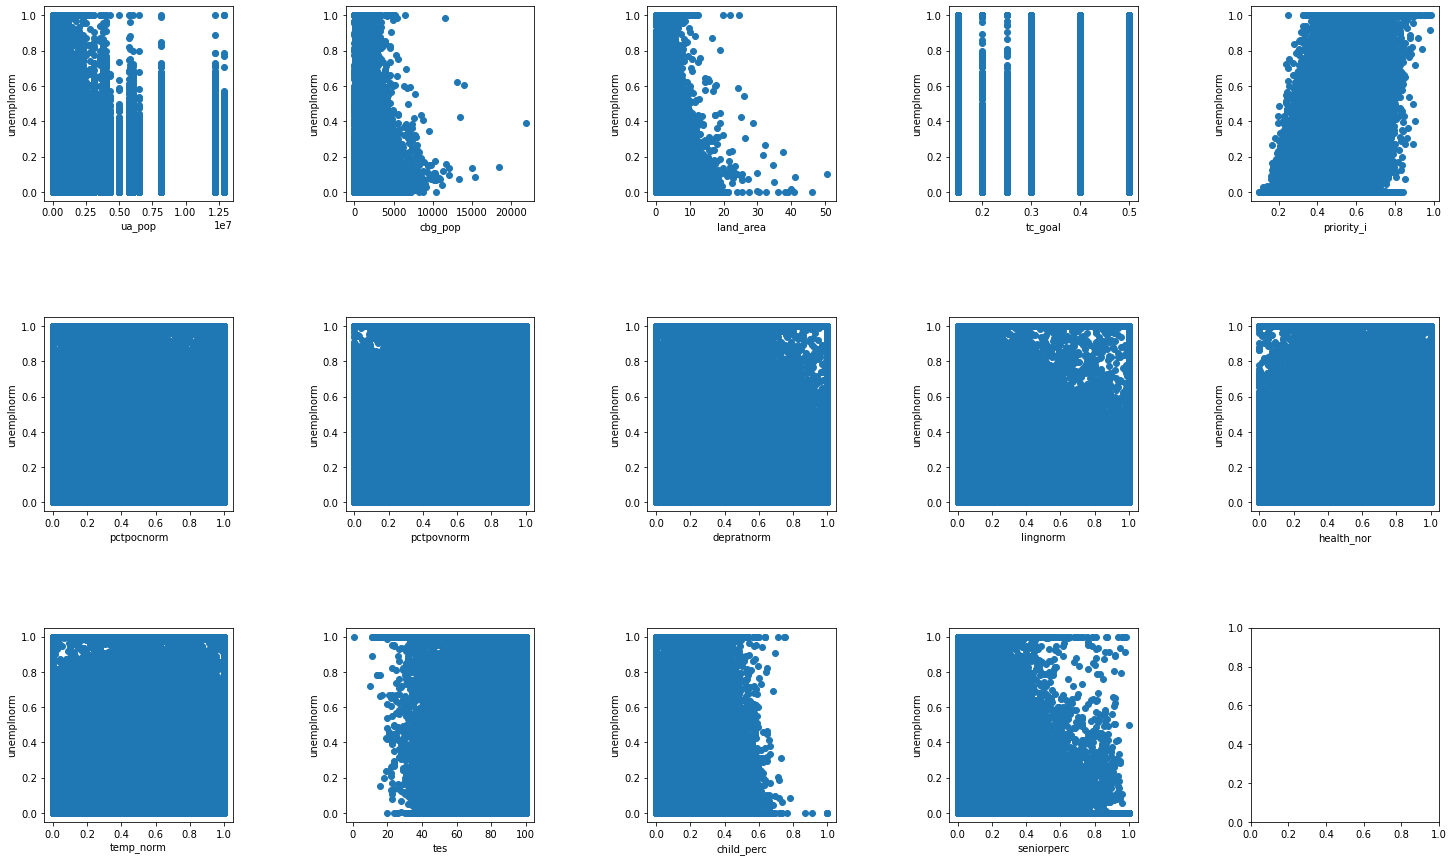

In [27]:
fig, axarr = plt.subplots(3, 5, figsize=(25, 15))
plt.subplots_adjust(hspace = .6, wspace = .6)

col = numerical_features.columns
count = 1
counter1 = 0
counter2 = 0
for c in col:
    axarr[counter1, counter2].scatter(data = df, x = c, y = 'unemplnorm')
    axarr[counter1, counter2].set_xlabel(c)
    axarr[counter1, counter2].set_ylabel("unemplnorm")
    count += 1
    if count in range(0,6):
        counter2 += 1
    if count == 6:
            counter2 = -1
            counter1 = 1
    if count in range(6,11):
        counter2 += 1
    if count == 11:
        counter2 = -1
        counter1 = 2
    if count in range(11,20):
        counter2 += 1

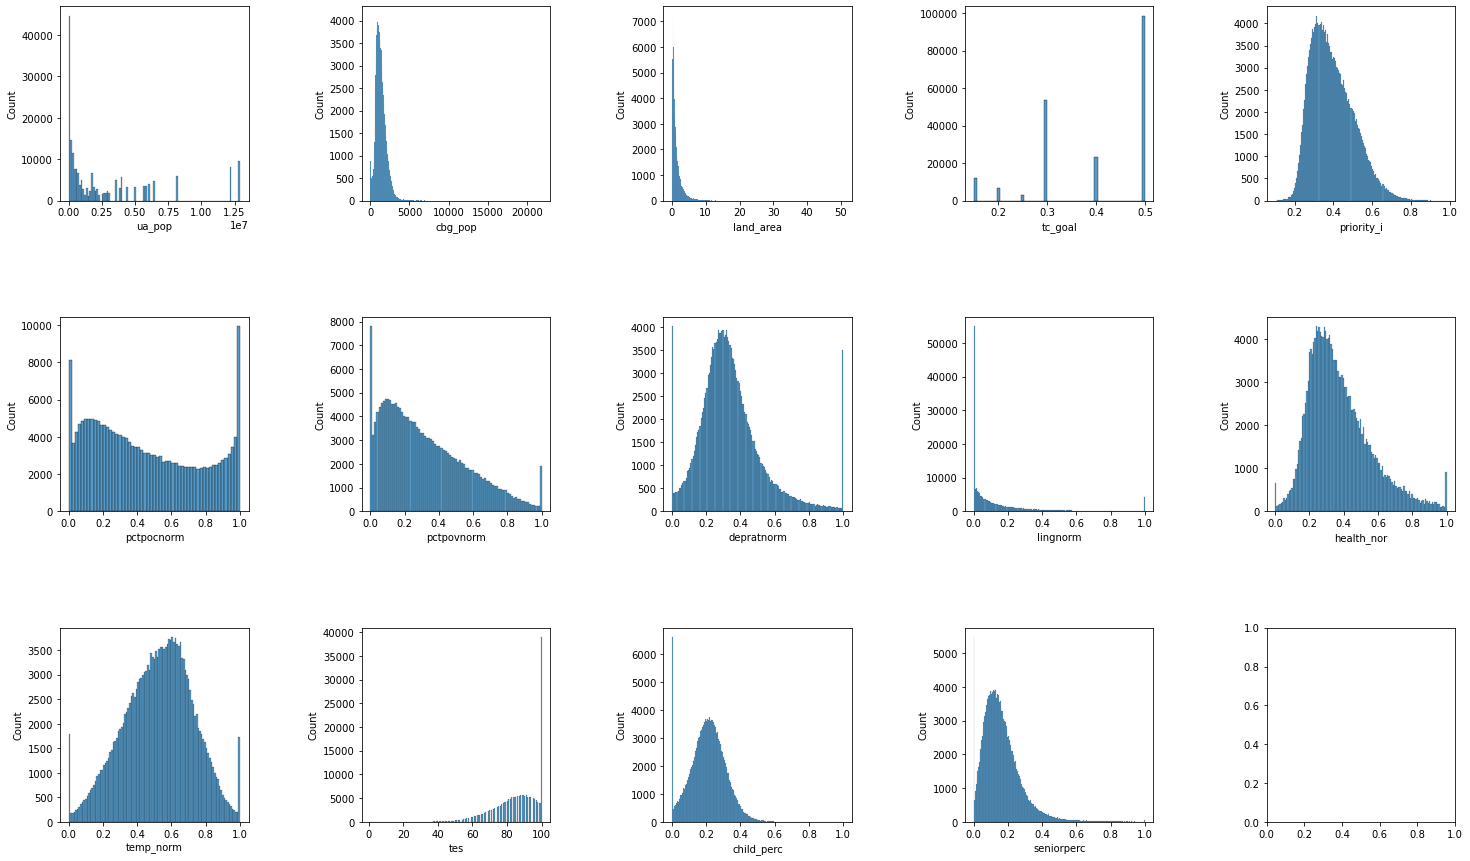

In [28]:
fig, axarr = plt.subplots(3, 5, figsize=(25, 15))
plt.subplots_adjust(hspace = .6, wspace = .6)

col = numerical_features.columns
count = 1
counter1 = 0
counter2 = 0
for c in col:
    sns.histplot(ax = axarr[counter1, counter2], data = df, x = c)
    axarr[counter1, counter2].set_xlabel(c)
    count += 1
    if count in range(0,6):
        counter2 += 1
    if count == 6:
            counter2 = -1
            counter1 = 1
    if count in range(6,11):
        counter2 += 1
    if count == 11:
        counter2 = -1
        counter1 = 2
    if count in range(11,20):
        counter2 += 1

In [29]:
print(numerical_features['tc_goal'].value_counts())
# print(numerical_features['treecanopy'].value_counts())

# tc_goal should we make this a categorical feature - oridinal encode?
# treecanopy -1 means missing probably should drop

0.50    98616
0.30    53484
0.40    23316
0.15    12177
0.20     6651
0.25     3261
Name: tc_goal, dtype: int64


In [30]:
# df = df.drop(columns = 'treecanopy')
# numerical_features = numerical_features.drop(columns = 'treecanopy')

## Categorical Data

<AxesSubplot:xlabel='biome', ylabel='count'>

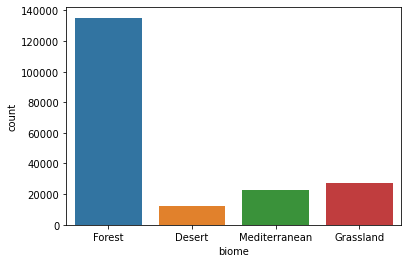

In [31]:
sns.countplot(data = df, x='biome')

<AxesSubplot:xlabel='unemplnorm', ylabel='biome'>

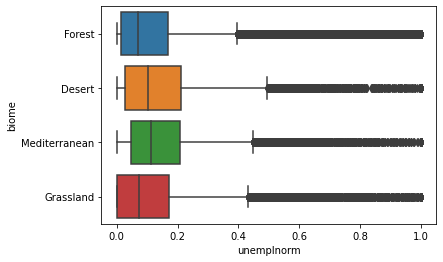

In [32]:
sns.boxplot(data=df, y='biome', x = 'unemplnorm')

<AxesSubplot:xlabel='unemplnorm', ylabel='Count'>

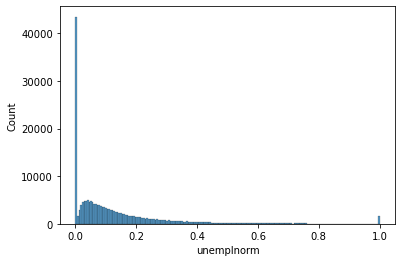

In [33]:
sns.histplot(data = df_y, x = df_y)

In [32]:
df_X

ua_pop  cbg_pop  acs_pop  land_area   biome  tc_goal  priority_i  \
0        29561     3234   3055.0   8.209274  Forest     0.50    0.345039   
1        29561     1787   2545.0   6.140281  Forest     0.50    0.401266   
2        29561      669    595.0   1.519179  Forest     0.50    0.394139   
3        29561     1066   1888.0   2.764926  Forest     0.50    0.460517   
4        29561     1509   1969.0   4.529689  Forest     0.50    0.376254   
...        ...      ...      ...        ...     ...      ...         ...   
197500    4889      679    500.0   0.487370  Desert     0.15    0.468023   
197501    4889      794    918.0   0.612998  Desert     0.15    0.515015   
197502    4889      866    790.0   0.887394  Desert     0.15    0.479058   
197503    4889     1106   1380.0   2.436556  Desert     0.15    0.473029   
197504    4889      915    931.0   1.271366  Desert     0.15    0.456133   

        pctpocnorm  pctpovnorm  depratnorm  lingnorm  health_nor  temp_norm  \
0         0.515355    0.122218    0.621153  0.026925    0.412103   0.208102   
1         0.404247    0.279557    0.220347  0.026925    0.412103   0.000000   
2         0.000000    0.486684    1.000000  0.000000    0.761111   0.039956   
3         0.604608    0.602632    0.484690  0.000000    0.761111   0.310766   
4         0.175937    0.551805    0.282945  0.000000    0.761111   0.295228   
...            ...         ...         ...       ...         ...        ...   
197500    0.560117    0.313697    0.512877  0.000000    0.685850   0.789859   
197501    0.301962    0.659753    0.944887  0.000000    0.685850   0.586439   
197502    0.468452    0.339444    0.519216  0.000000    0.685850   0.886378   
197503    0.337545    0.212688    0.589091  0.000000    0.824291   0.663409   
197504    0.197985    0.389573    0.610000  0.000000    0.824291   0.729994   

        tes  child_perc  seniorperc  
0        73    0.334206    0.115876  
1        74    0.156385    0.130452  
2        69    0.235294    0.312605  
3        68    0.256356    0.147246  
4        71    0.178771    0.139665  
...     ...         ...         ...  
197500  100    0.182000    0.234000  
197501  100    0.397603    0.169935  
197502   99    0.196203    0.222785  
197503   98    0.181159    0.268841  
197504   96    0.183673    0.274973  

[197505 rows x 16 columns]

In [33]:
df_X = df.drop(['unemplnorm'], axis = 1)
X_dev, X_test, y_dev, y_test = train_test_split(df_X, df_y, 
                                                random_state=42,
                                                test_size = .2)

In [59]:
print(X_dev)

         ua_pop  cbg_pop  land_area      biome  tc_goal  priority_i  \
85848   4309006      712   0.072077     Forest     0.40    0.571535   
185760    73377     1406   1.554872     Forest     0.50    0.293490   
78212    833101     1713   1.709003     Forest     0.50    0.234982   
51859    204538     1424   3.262445     Forest     0.50    0.351407   
171450  5849038     1457   1.209736  Grassland     0.30    0.477424   
...         ...      ...        ...        ...      ...         ...   
119879  6517519      813   0.681145     Forest     0.50    0.314302   
103694  1799924      400   0.358513     Forest     0.50    0.362412   
131932   413650      976   0.176933     Forest     0.30    0.436242   
146867     6207      749   2.910959  Grassland     0.30    0.471538   
121958  2196623     4865   5.971333     Desert     0.15    0.365937   

        pctpocnorm  pctpovnorm  depratnorm  lingnorm  health_nor  temp_norm  \
85848     0.913366    0.643564    0.414027  0.173675    0.697119   0

In [34]:
from category_encoders import TargetEncoder
# Create the target encoder
encoder = TargetEncoder()

# Fit the encoder on the development set (you should pass both the feature and the target)
encoder.fit(X_dev['biome'].astype(str), y_dev)

# Transform the feature (apply the encoding)
transformed_biome = encoder.transform(X_dev['biome'].astype(str))
transformed_biome_test = encoder.transform(X_test['biome'].astype(str))

X_dev['biome_target'] = transformed_biome
X_test['biome_target'] = transformed_biome_test

print(transformed_biome)

/Users/wujinze/opt/anaconda3/lib/python3.8/site-packages/category_encoders/target_encoder.py:92: FutureWarning:

Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327

/Users/wujinze/opt/anaconda3/lib/python3.8/site-packages/category_encoders/target_encoder.py:97: FutureWarning:

Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327



           biome
85848   0.128138
185760  0.128138
78212   0.128138
51859   0.128138
171450  0.132126
...          ...
119879  0.128138
103694  0.128138
131932  0.128138
146867  0.132126
121958  0.157689

[158004 rows x 1 columns]


In [35]:
from sklearn.preprocessing import OrdinalEncoder


# Create the ordinal encoder
encoder_ordinal = OrdinalEncoder()

encoder_ordinal.fit(X_dev[['tc_goal']])
transformed_tc_goal = encoder_ordinal.transform(X_dev[['tc_goal']])
transformed_tc_goal_test = encoder_ordinal.transform(X_test[['tc_goal']])

X_dev['tc_goal_ordinal'] = transformed_tc_goal
X_test['tc_goal_ordinal'] = transformed_tc_goal_test

print(X_dev['tc_goal_ordinal'])

85848     4.0
185760    5.0
78212     5.0
51859     5.0
171450    3.0
         ... 
119879    5.0
103694    5.0
131932    3.0
146867    3.0
121958    0.0
Name: tc_goal_ordinal, Length: 158004, dtype: float64


In [36]:
X_dev = X_dev.drop(['biome','tc_goal'], axis = 1)

In [37]:
X_test = X_test.drop(['biome','tc_goal'], axis = 1)

In [63]:
X_dev.reset_index(drop=True, inplace=True)  
X_test.reset_index(drop=True, inplace=True)

RMSE: 0.00
R^2: 1.00


Text(0.5, 1.0, 'Feature importances')

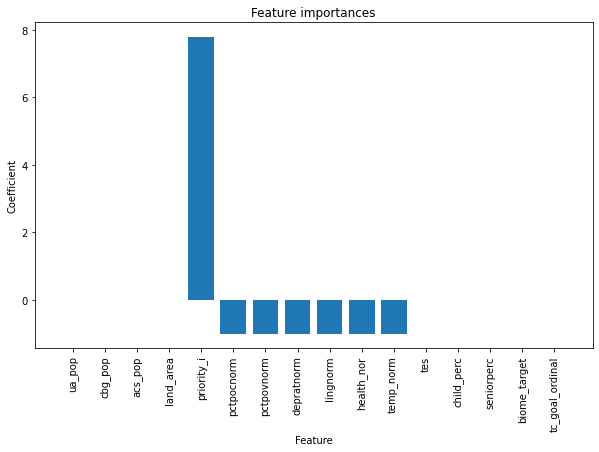

In [58]:
# Implement Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Create the model
model = LinearRegression()

# Fit the model on the development set
model.fit(X_dev, y_dev)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the RMSE and R^2 score on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE: {:.2f}".format(rmse))
print("R^2: {:.2f}".format(r2))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(X_dev.columns, model.coef_)
plt.xticks(rotation=90)
plt.ylabel("Coefficient")
plt.xlabel("Feature")
plt.title("Feature importances")



RMSE: 0.16
R^2: 0.09


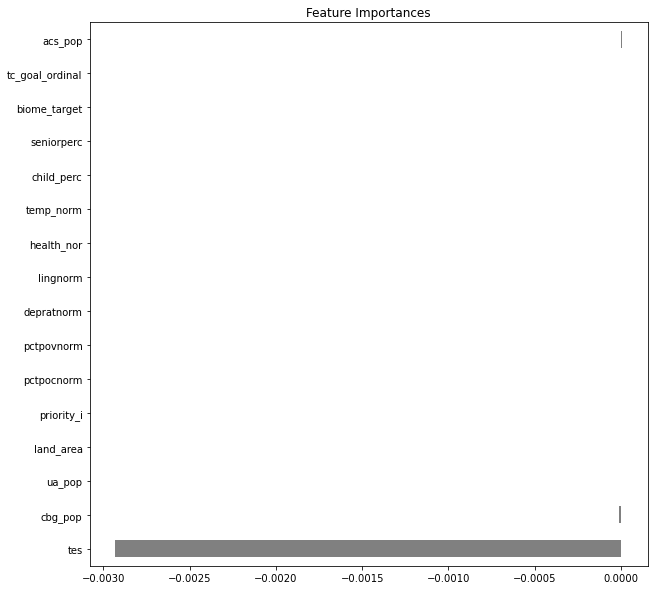

In [57]:
# Implement ElasticNet
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score    

# Create the model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the model
model.fit(X_dev, y_dev)

# Predict on the test set
y_pred = model.predict(X_test)

# Print the mean absolute error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE: {:.2f}".format(rmse))
print("R^2: {:.2f}".format(r2))

# Show feature importances
importances = pd.Series(model.coef_, X_dev.columns)
plt.figure(figsize=(10, 10))
importances.sort_values().plot.barh(color='grey')
plt.title('Feature Importances')
plt.show()

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3394
[LightGBM] [Info] Number of data points in the train set: 158004, number of used features: 16
[LightGBM] [Info] Start training from score 0.133330
RMSE: 0.09
R^2: 0.75


Text(0.5, 1.0, 'Feature importances')

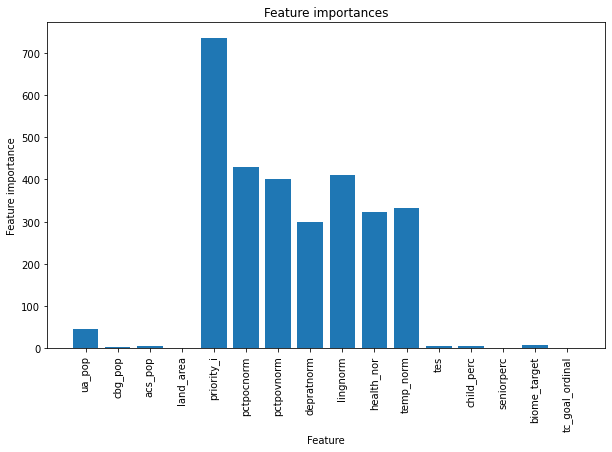

In [56]:
# Use lightgbm for regression
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Create the model
model = lgb.LGBMRegressor()

# Fit the model on the development set
model.fit(X_dev, y_dev)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the RMSE and R^2 score on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE: {:.2f}".format(rmse))
print("R^2: {:.2f}".format(r2))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(X_dev.columns, model.feature_importances_)
plt.xticks(rotation=90)
plt.ylabel("Feature importance")
plt.xlabel("Feature")
plt.title("Feature importances")
